# 환경 설정

In [1]:
# 페키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 폰트 오류 해결
import platform
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [3]:
# 행 개수 조정
# pd.set_option('display.max_row', 200)

# 열 개수 조정
pd.set_option('display.max_columns', 200)

# 선정한 데이터 설명

## 데이터 이름 : 
ILPD (Indian Liver Patient Dataset)

## 데이터 출처 : 
https://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29

## 데이터 내용 : 
416개의 간 환자 기록과 167개의 비 간 환자의 기록  
Classification 연습 용 자료

## 데이터 Columns :
1. Age : 환자의 나이
2. Gender : 환자의 성별
3. TB : 총빌리루빈(Total Bilirubin)
4. DB : 직접빌리루빈(Direct Bilirubin)
5. Alkphos : 알칼리인산분해효소(Alkaline Phosphotase)
6. Sgpt : Alamine Aminotransferase (간세포 등에 분포하는 일종의 전환 효소) (간수치 지표 1)
7. Sgot : Aspartate Aminotransferase (간세포 등에 분포하는 일종의 전환 효소) (간수치 지표 2)
8. TP : 총 단백질량(Total Protiens)
9. ALB : 알부민(Albumin)
10. A/G : 알부민/글로블린 비(Ratio Albumin and Globulin Ratio)
11. Selector : field used to split the data into two sets (labeled by the experts) (1: 간 환자, 2: 비 간 환자)

11번 Selector가 종속변수라고 할 수 있다.

# 데이터 불러오기

In [4]:
df_indian = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv',
                       names = ['Age', 'Gender', 'TB', 'DB', "Alkphos", 'Sgpt', 'Sgot', 'TP', 'ALB', "A/G", 'Selector'],
                       header = None)

df_indian

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# 카테고리 개수 확인

## 간 환자와 비 간 환자 수 확인

In [5]:
df_indian.Selector.value_counts()

1    416
2    167
Name: Selector, dtype: int64

## 성별 확인

In [6]:
df_indian.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

# EDA_1 결측치 처리

## 결측치 확인

In [7]:
df_indian.isnull().sum()

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TP          0
ALB         0
A/G         4
Selector    0
dtype: int64

## 결측치가 존재하는 A/G 데이터 확인

<AxesSubplot:xlabel='A/G', ylabel='Density'>

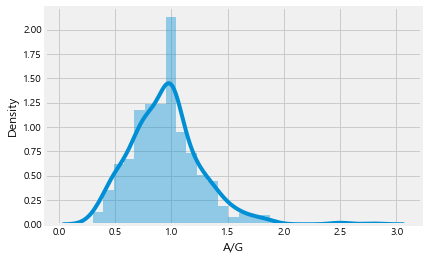

In [8]:
sns.distplot(df_indian['A/G'])

In [9]:
df_indian[df_indian['A/G'].isnull()]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


## 결측치 제거

데이터가 500개가 넘고 결측치가 4개밖에 되지 않으므로 삭제한다

### 그 전에 오리지날 데이터 셋 저장

결측 값을 제거한 데이터를 주로 사용하고 원본데이터는 거의 사용하지 않을 거 같지만 혹시 모르니 저장

In [10]:
df_indian_original = df_indian[df_indian.columns]

In [11]:
df_indian_original

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### 제거

In [12]:
len(df_indian)

583

In [13]:
df_indian = df_indian.dropna(axis = 0)

In [14]:
len(df_indian)

579

### 인덱스 재 정렬

In [15]:
df_indian.reset_index(inplace = True)

In [16]:
df_indian

,index,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
574,578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
575,579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
576,580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
577,581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


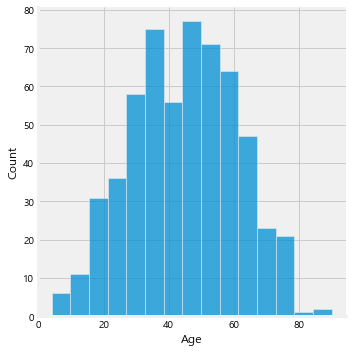

In [17]:
sns.displot(x = 'Age', data = df_indian)

plt.show()

# EDA_2 : 이상치 확인

## Boxplot을 통한 이상치 확인 - 1개씩

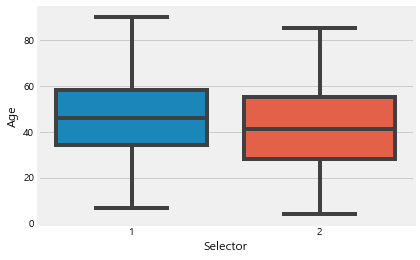

In [18]:
sns.boxplot(x = "Selector", y = 'Age', data = df_indian)

plt.show()

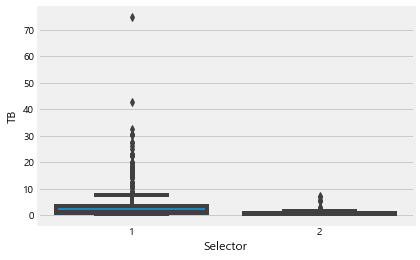

In [19]:
sns.boxplot(x = "Selector", y = 'TB', data = df_indian)

plt.show()

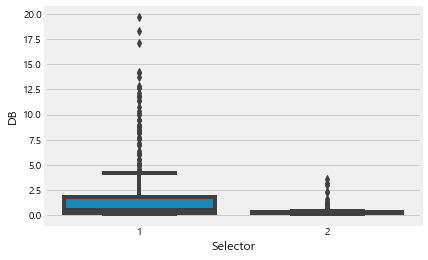

In [20]:
sns.boxplot(x = "Selector", y = 'DB', data = df_indian)

plt.show()

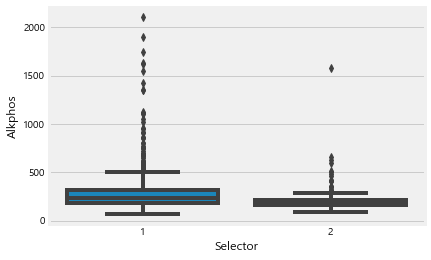

In [21]:
sns.boxplot(x = "Selector", y = 'Alkphos', data = df_indian)

plt.show()

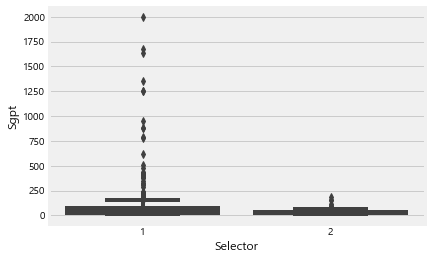

In [22]:
sns.boxplot(x = "Selector", y = 'Sgpt', data = df_indian)

plt.show()

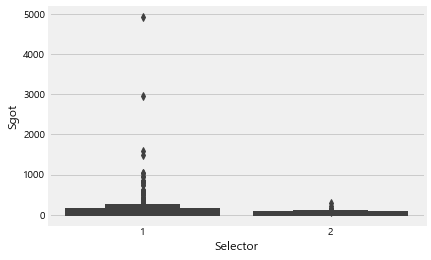

In [23]:
sns.boxplot(x = "Selector", y = 'Sgot', data = df_indian)

plt.show()

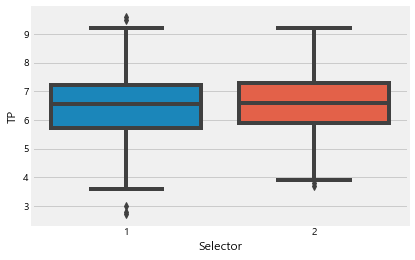

In [24]:
sns.boxplot(x = "Selector", y = 'TP', data = df_indian)

plt.show()

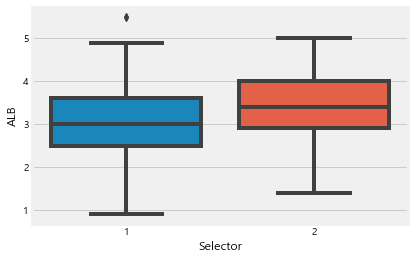

In [25]:
sns.boxplot(x = "Selector", y = 'ALB', data = df_indian)

plt.show()

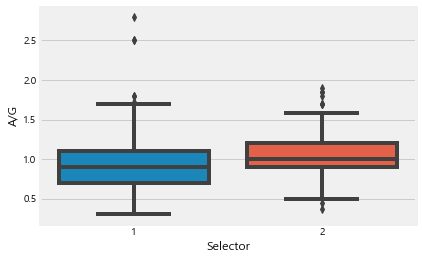

In [26]:
sns.boxplot(x = "Selector", y = 'A/G', data = df_indian)

plt.show()

## Boxplot을 통한 이상치 확인 - 한번에

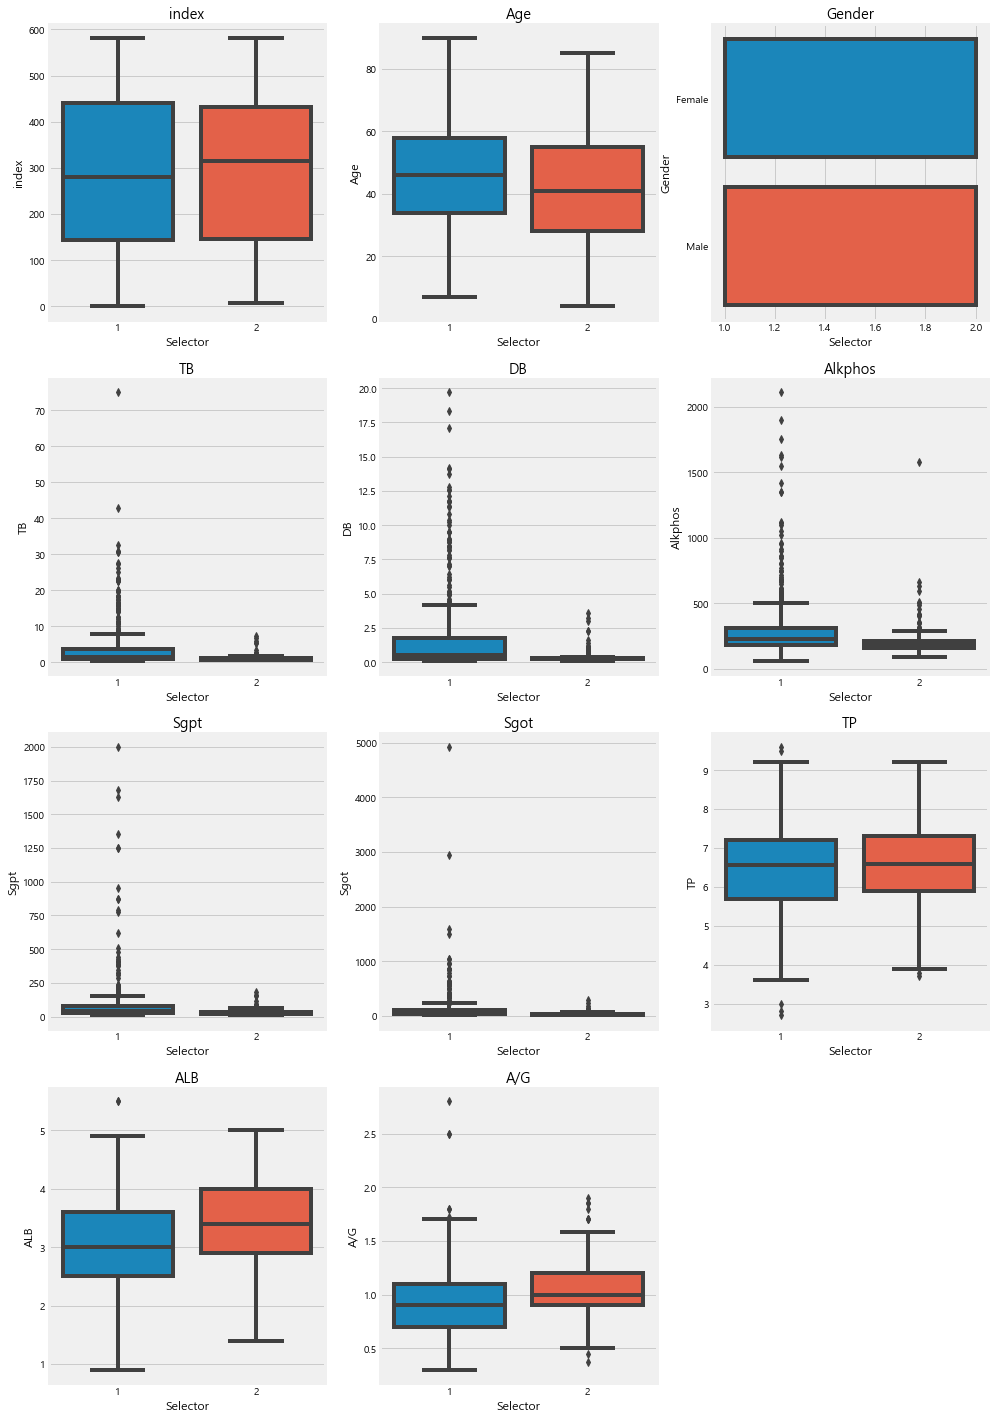

In [27]:
import math

fig = plt.figure(figsize = (15, 25))

for i in range(1, len(df_indian.columns)) :
    locals()["area_"+str(i)] = fig.add_subplot(math.ceil(len(df_indian.columns)/3),3,i)

ar = 1
for c in df_indian.columns :
    if ar >= len(df_indian.columns) :
        break
    sns.boxplot(x = "Selector", y = c, data = df_indian, ax = locals()["area_"+str(ar)])
    locals()["area_"+str(ar)].set_title(c)
    ar += 1

## distplot 통한 이상치 확인 - 한번에

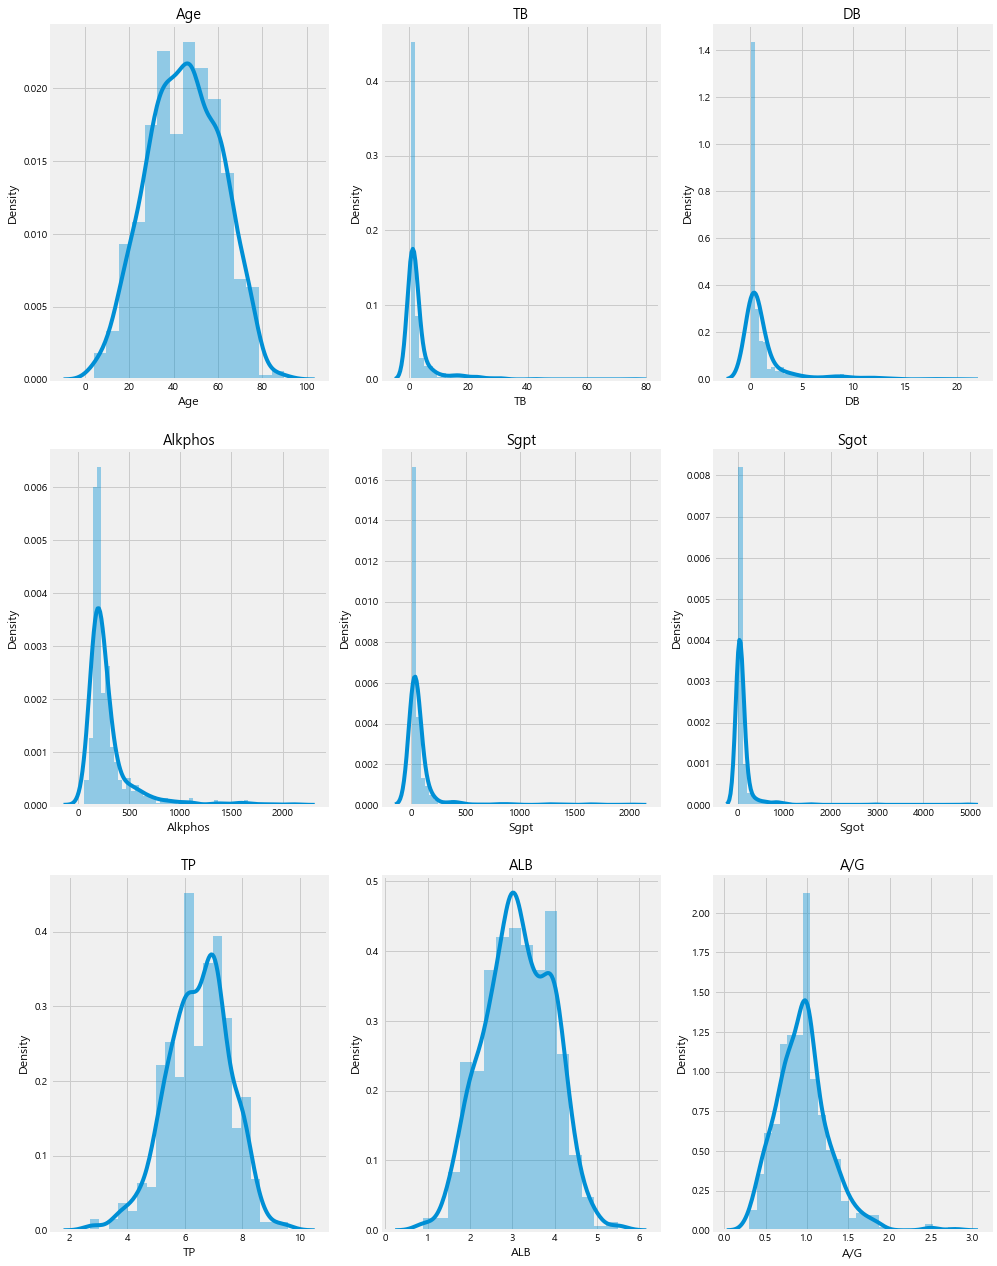

In [28]:
import math

fig = plt.figure(figsize = (15, 30))

dc = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G']

for i in range(1, len(dc)+1) :
    locals()["area_"+str(i)] = fig.add_subplot(math.ceil(len(df_indian.columns)/3),3,i)

ar = 1
for c in dc :
    if ar >= len(df_indian.columns) :
        break
    sns.distplot(df_indian[c], ax = locals()["area_"+str(ar)])
    locals()["area_"+str(ar)].set_title(c)
    ar += 1

# EDA_3 왜도가 존재하는 데이터 확인

'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot' column은 왜도가 존재하는 것으로 보이므로 더 자세히 확인한다

## displot으로 확인_1

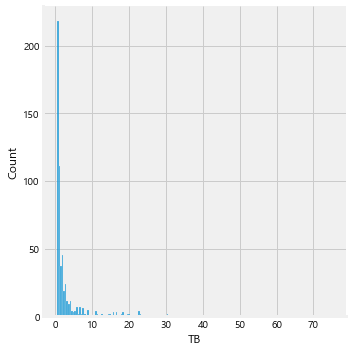

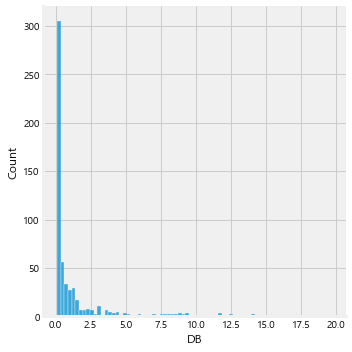

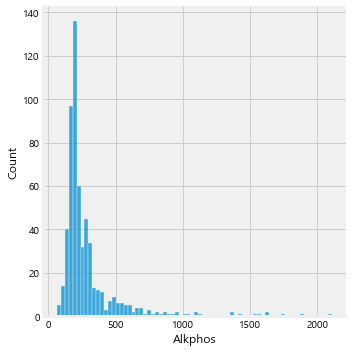

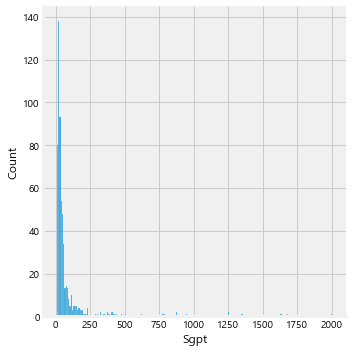

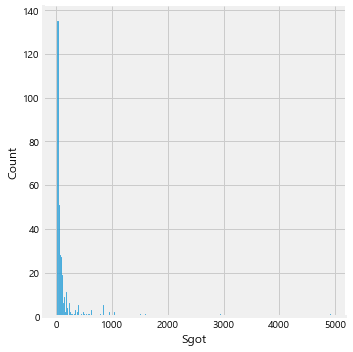

In [29]:
sns.displot(df_indian, x = "TB")
sns.displot(df_indian, x = "DB")
sns.displot(df_indian, x = "Alkphos")
sns.displot(df_indian, x = "Sgpt")
sns.displot(df_indian, x = "Sgot")

plt.show()

### (추가) 나눠서 확인

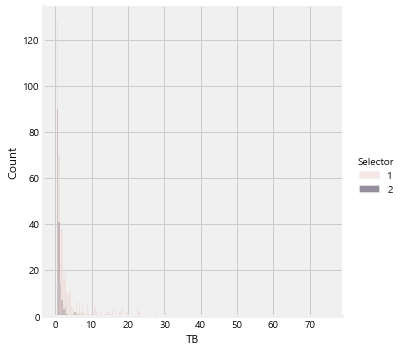

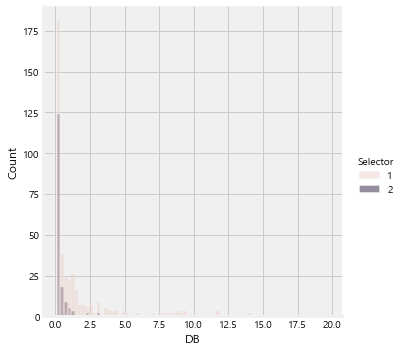

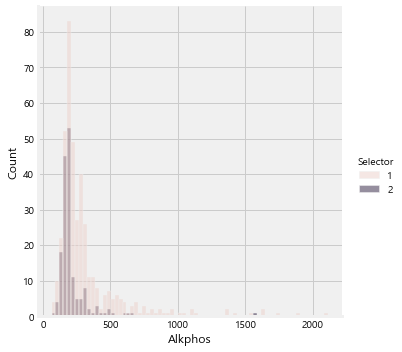

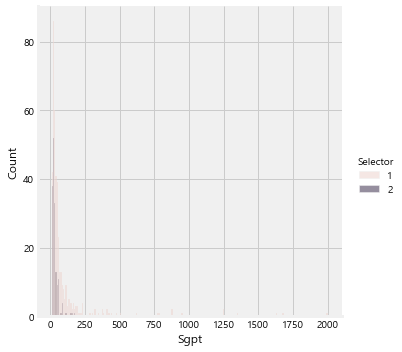

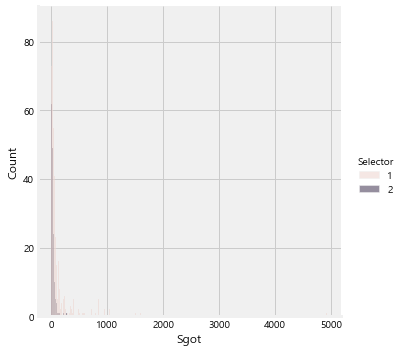

In [30]:
sns.displot(df_indian, x = "TB", hue = "Selector")
sns.displot(df_indian, x = "DB", hue = "Selector")
sns.displot(df_indian, x = "Alkphos", hue = "Selector")
sns.displot(df_indian, x = "Sgpt", hue = "Selector")
sns.displot(df_indian, x = "Sgot", hue = "Selector")

plt.show()

## displot으로 확인_2

범위를 조금 줄여서 다시 확인한다

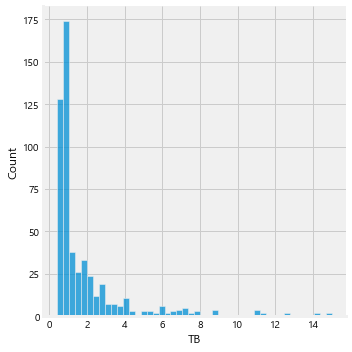

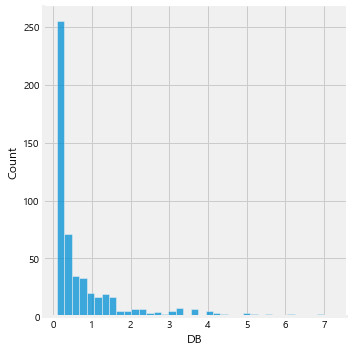

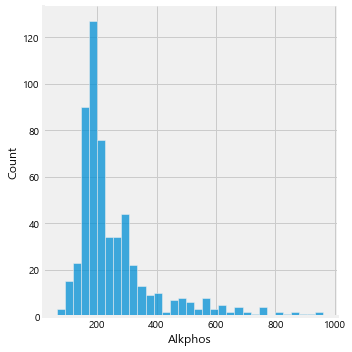

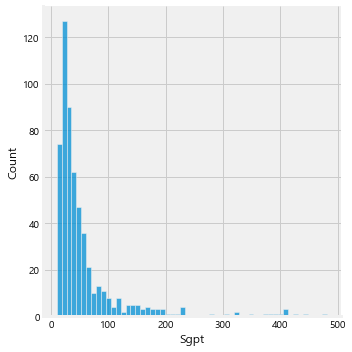

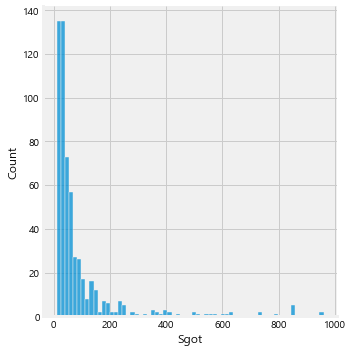

In [31]:
sns.displot(df_indian[df_indian.TB <= 15], x = "TB")
sns.displot(df_indian[df_indian.DB <= 7.5], x = "DB")
sns.displot(df_indian[df_indian.Alkphos <= 1000], x = "Alkphos")
sns.displot(df_indian[df_indian.Sgpt <= 500], x = "Sgpt")
sns.displot(df_indian[df_indian.Sgot <= 1000], x = "Sgot")

plt.show()

### (추가) 나눠서 확인

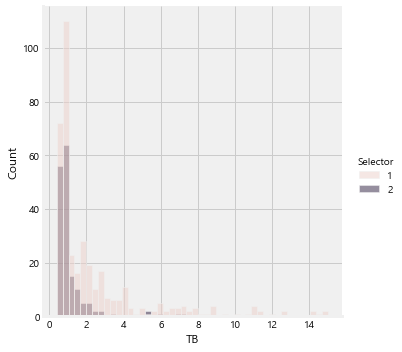

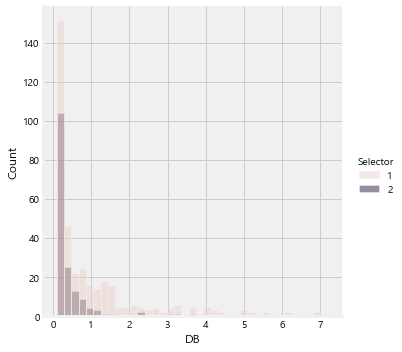

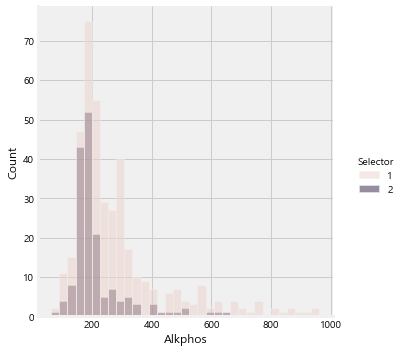

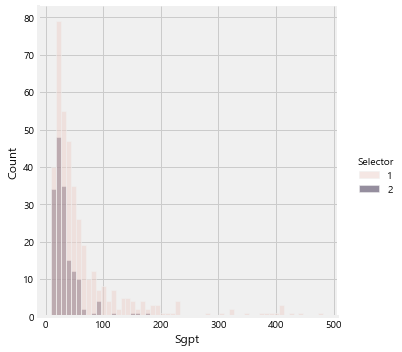

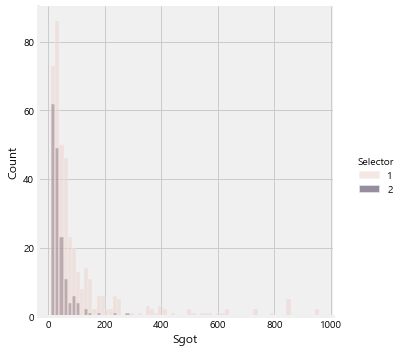

In [32]:
sns.displot(df_indian[df_indian.TB <= 15], x = "TB", hue = "Selector")
sns.displot(df_indian[df_indian.DB <= 7.5], x = "DB", hue = "Selector")
sns.displot(df_indian[df_indian.Alkphos <= 1000], x = "Alkphos", hue = "Selector")
sns.displot(df_indian[df_indian.Sgpt <= 500], x = "Sgpt", hue = "Selector")
sns.displot(df_indian[df_indian.Sgot <= 1000], x = "Sgot", hue = "Selector")

plt.show()

## distplot으로 확인_1

그래프와 함께 확인하기 위해 distplot으로 확인한다.

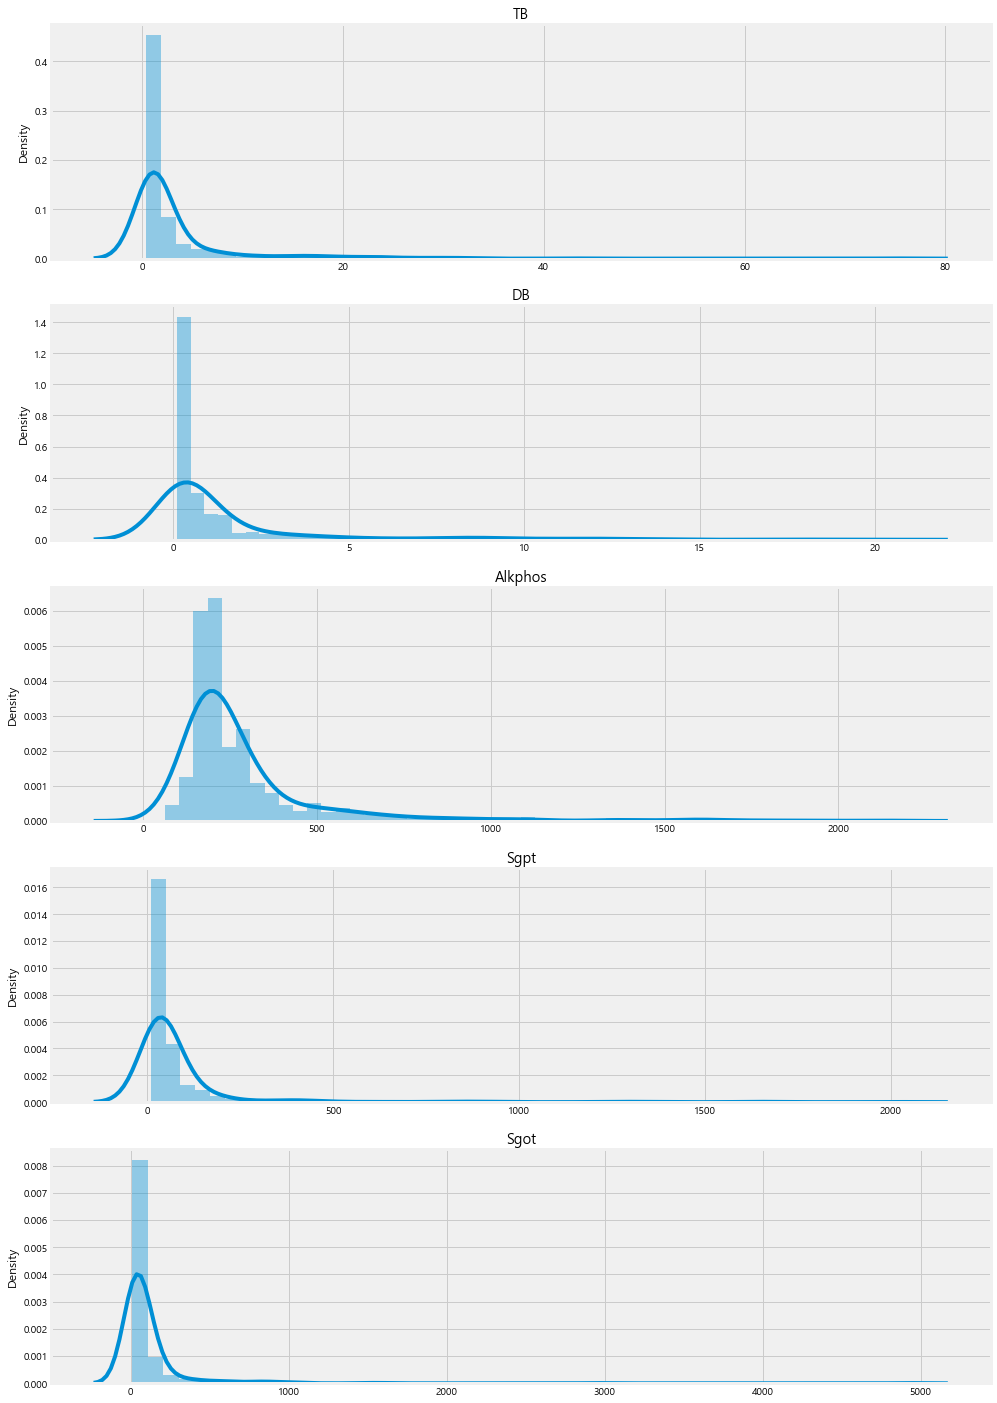

In [33]:
fig, axes = plt.subplots(5)
fig.set_size_inches(15, 25)

sns.distplot(df_indian.TB.values, ax = axes[0])
axes[0].set_title("TB")

sns.distplot(df_indian.DB.values, ax = axes[1])
axes[1].set_title("DB")

sns.distplot(df_indian.Alkphos.values, ax = axes[2])
axes[2].set_title("Alkphos")

sns.distplot(df_indian.Sgpt.values, ax = axes[3])
axes[3].set_title("Sgpt")


sns.distplot(df_indian.Sgot.values, ax = axes[4])
axes[4].set_title("Sgot")

plt.show()

### (추가) 나눠서 확인

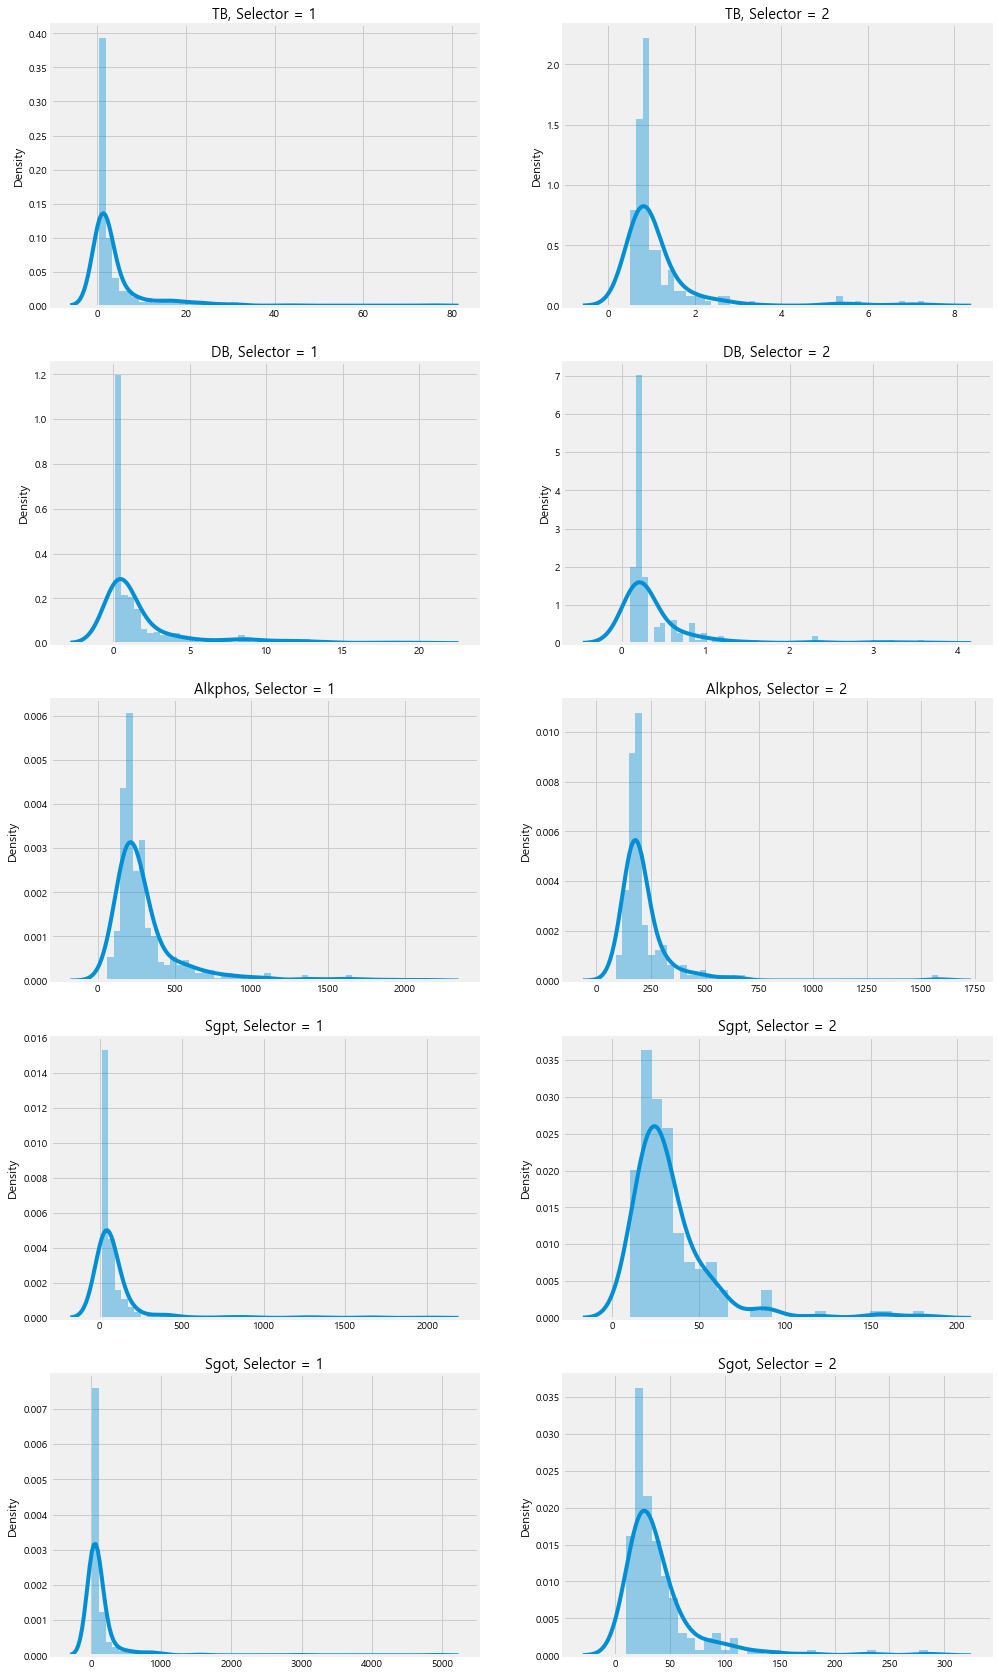

In [34]:
fig, axes = plt.subplots(5, 2)
fig.set_size_inches(15, 30)

sns.distplot(df_indian[df_indian.Selector == 1].TB.values, ax = axes[0][0])
sns.distplot(df_indian[df_indian.Selector == 2].TB.values, ax = axes[0][1])
axes[0][0].set_title("TB, Selector = 1")
axes[0][1].set_title("TB, Selector = 2")

sns.distplot(df_indian[df_indian.Selector == 1].DB.values, ax = axes[1][0])
sns.distplot(df_indian[df_indian.Selector == 2].DB.values, ax = axes[1][1])
axes[1][0].set_title("DB, Selector = 1")
axes[1][1].set_title("DB, Selector = 2")

sns.distplot(df_indian[df_indian.Selector == 1].Alkphos.values, ax = axes[2][0])
sns.distplot(df_indian[df_indian.Selector == 2].Alkphos.values, ax = axes[2][1])
axes[2][0].set_title("Alkphos, Selector = 1")
axes[2][1].set_title("Alkphos, Selector = 2")

sns.distplot(df_indian[df_indian.Selector == 1].Sgpt.values, ax = axes[3][0])
sns.distplot(df_indian[df_indian.Selector == 2].Sgpt.values, ax = axes[3][1])
axes[3][0].set_title("Sgpt, Selector = 1")
axes[3][1].set_title("Sgpt, Selector = 2")

sns.distplot(df_indian[df_indian.Selector == 1].Sgot.values, ax = axes[4][0])
sns.distplot(df_indian[df_indian.Selector == 2].Sgot.values, ax = axes[4][1])
axes[4][0].set_title("Sgot, Selector = 1")
axes[4][1].set_title("Sgot, Selector = 2")

plt.show()

## distplot으로 확인_2

범위를 좁혀서 다시 그려본다

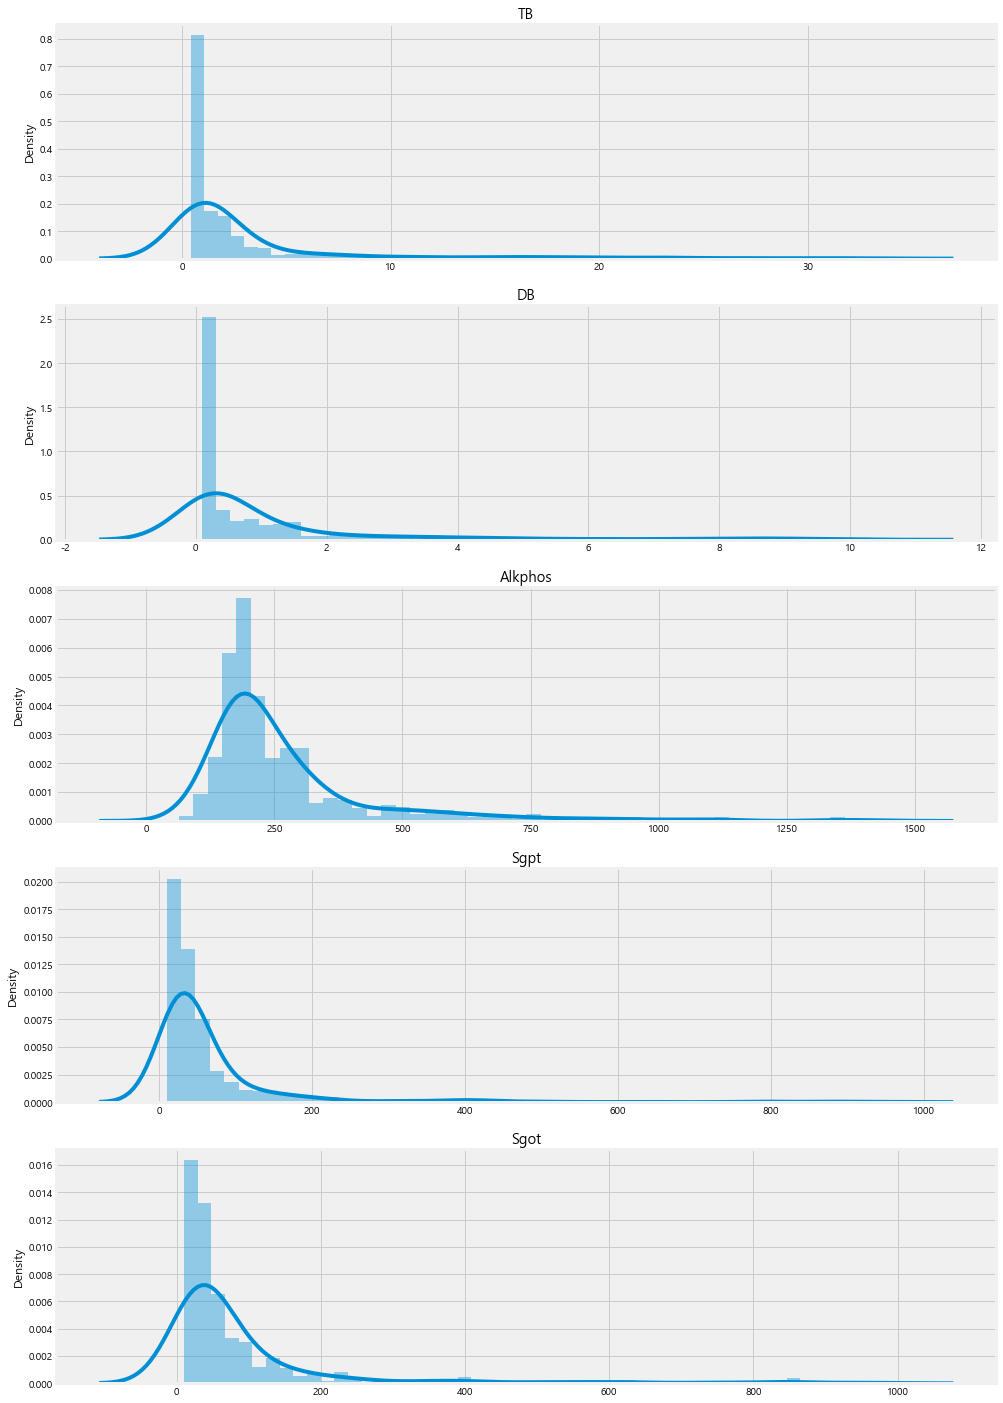

In [35]:
fig, axes = plt.subplots(5)
fig.set_size_inches(15, 25)

sns.distplot(df_indian[df_indian.TB <= 40].TB.values, ax = axes[0])
axes[0].set_title("TB")

sns.distplot(df_indian[df_indian.DB <= 10].DB.values, ax = axes[1])
axes[1].set_title("DB")

sns.distplot(df_indian[df_indian.Alkphos <= 1500].Alkphos.values, ax = axes[2])
axes[2].set_title("Alkphos")

sns.distplot(df_indian[df_indian.Sgpt <= 1000].Sgpt.values, ax = axes[3])
axes[3].set_title("Sgpt")

sns.distplot(df_indian[df_indian.Sgot <= 1000].Sgot.values, ax = axes[4])
axes[4].set_title("Sgot")

plt.show()

### (추가) 나눠서 확인

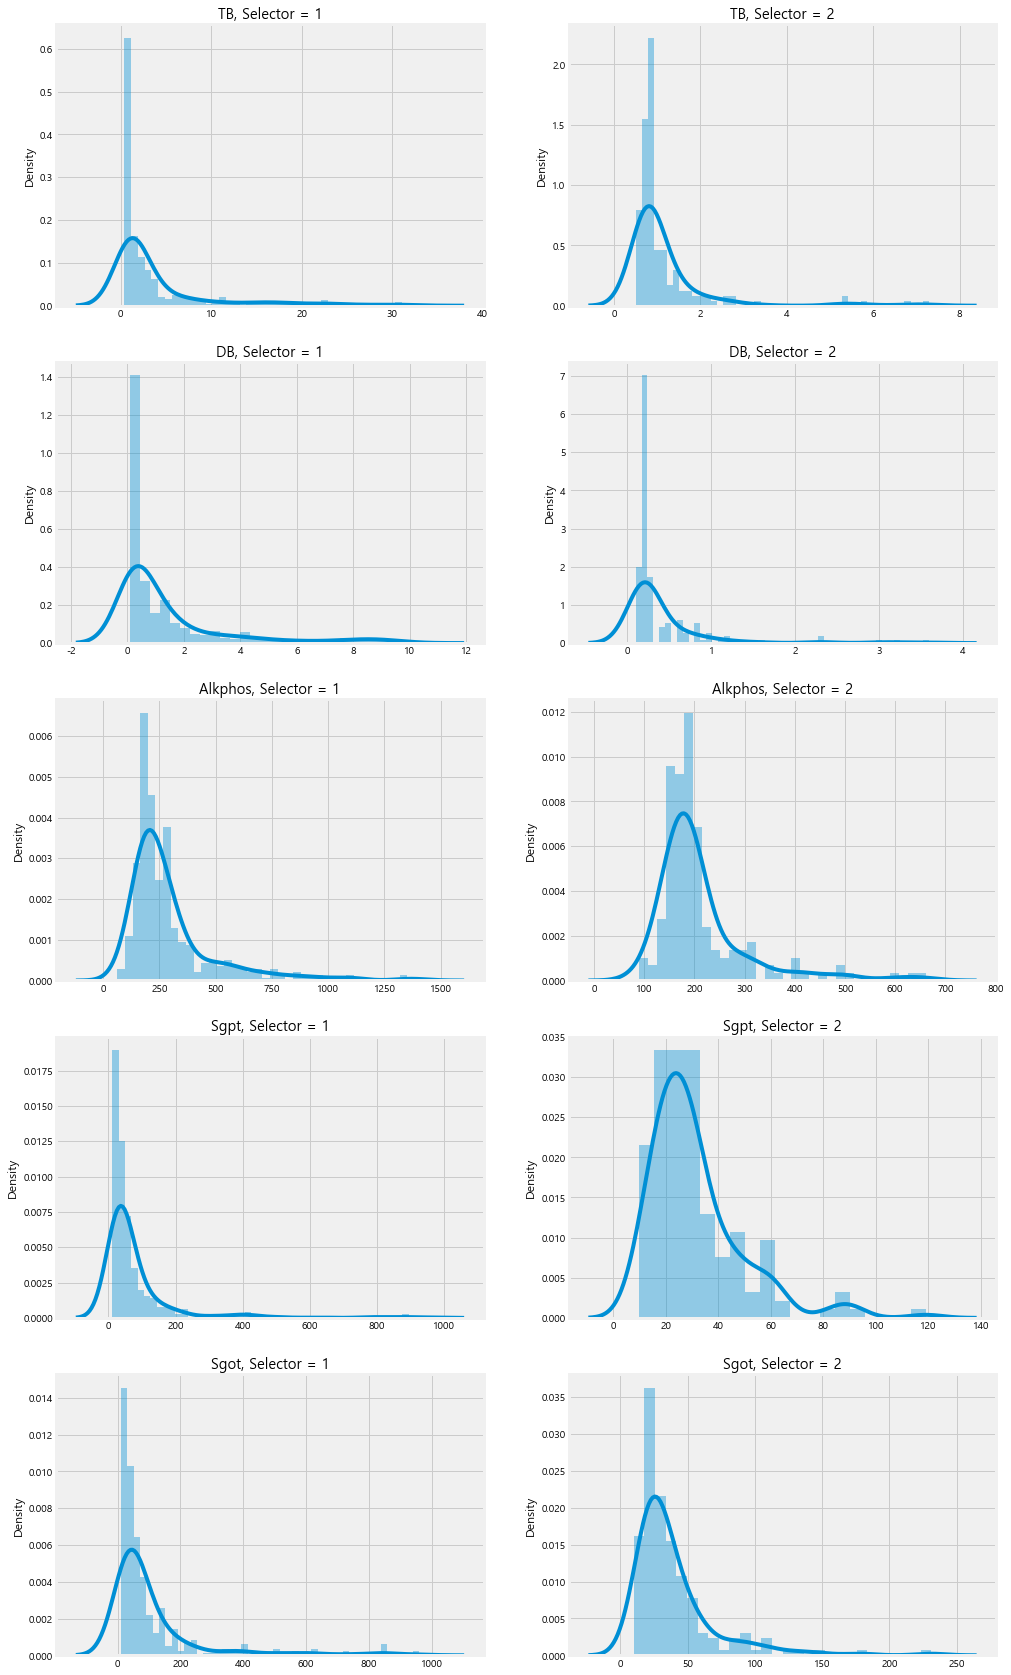

In [36]:
fig, axes = plt.subplots(5, 2)
fig.set_size_inches(15, 30)

sns.distplot(df_indian[(df_indian.Selector == 1) & (df_indian.TB <= 40)].TB.values, ax = axes[0][0])
sns.distplot(df_indian[(df_indian.Selector == 2) & (df_indian.TB <= 40)].TB.values, ax = axes[0][1])
axes[0][0].set_title("TB, Selector = 1")
axes[0][1].set_title("TB, Selector = 2")

sns.distplot(df_indian[(df_indian.Selector == 1) & (df_indian.DB <= 10)].DB.values, ax = axes[1][0])
sns.distplot(df_indian[(df_indian.Selector == 2) ].DB.values, ax = axes[1][1])
axes[1][0].set_title("DB, Selector = 1")
axes[1][1].set_title("DB, Selector = 2")

sns.distplot(df_indian[(df_indian.Selector == 1) & (df_indian.Alkphos <= 1500)].Alkphos.values, ax = axes[2][0])
sns.distplot(df_indian[(df_indian.Selector == 2) & (df_indian.Alkphos <= 1000)].Alkphos.values, ax = axes[2][1])
axes[2][0].set_title("Alkphos, Selector = 1")
axes[2][1].set_title("Alkphos, Selector = 2")

sns.distplot(df_indian[(df_indian.Selector == 1) & (df_indian.Sgpt <= 1000)].Sgpt.values, ax = axes[3][0])
sns.distplot(df_indian[(df_indian.Selector == 2) & (df_indian.Sgpt <= 150)].Sgpt.values, ax = axes[3][1])
axes[3][0].set_title("Sgpt, Selector = 1")
axes[3][1].set_title("Sgpt, Selector = 2")

sns.distplot(df_indian[(df_indian.Selector == 1) & (df_indian.Sgot <= 1000)].Sgot.values, ax = axes[4][0])
sns.distplot(df_indian[(df_indian.Selector == 2) & (df_indian.Sgot <= 250)].Sgot.values, ax = axes[4][1])
axes[4][0].set_title("Sgot, Selector = 1")
axes[4][1].set_title("Sgot, Selector = 2")

plt.show()

# EDA_4 왜도가 존재하는 데이터 변환 

## 1) TB 컬럼 변환

### 4가지 방법으로 변환

In [37]:
print("왜도 값")
df_indian_TB = df_indian[['TB']]
print("기존 : ", df_indian_TB['TB'].skew())

df_indian_TB['TB_log'] = np.log(df_indian.TB)
print("로그 변환 : ", df_indian_TB['TB_log'].skew())

df_indian_TB['TB_sqrt'] = np.sqrt(df_indian.TB)
print("제곱근 변환 : ", df_indian_TB['TB_sqrt'].skew())

df_indian_TB['TB_boxcox'] = pd.Series(stats.boxcox(df_indian.TB)[0])
print("Box-Cox 변환 : ", df_indian_TB['TB_boxcox'].skew())

왜도 값
기존 :  4.890767744276456
로그 변환 :  1.3098375130206403
제곱근 변환 :  2.491065651604868
Box-Cox 변환 :  0.34831962247397824


In [38]:
df_indian_TB

,TB,TB_log,TB_sqrt,TB_boxcox
0,0.7,-0.356675,0.836660,-0.407053
1,10.9,2.388763,3.301515,1.135021
2,7.3,1.987874,2.701851,1.052735
3,1.0,0.000000,1.000000,0.000000
4,3.9,1.360977,1.974842,0.864995
...,...,...,...,...
574,0.5,-0.693147,0.707107,-0.900625
575,0.6,-0.510826,0.774597,-0.618297
576,0.8,-0.223144,0.894427,-0.242214
577,1.3,0.262364,1.140175,0.238915


Text(0.5, 1.0, 'Box-Cox 변환')

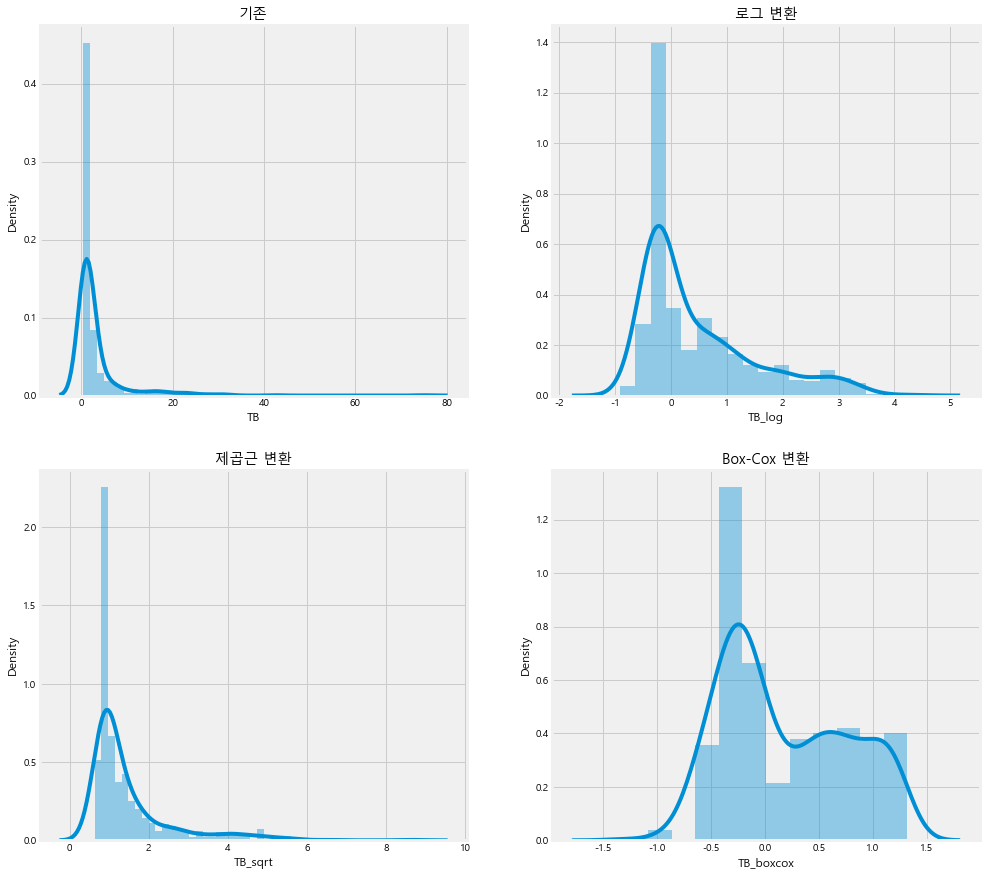

In [39]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15, 15)

sns.distplot(df_indian_TB['TB'], ax = axes[0][0])
sns.distplot(df_indian_TB['TB_log'], ax = axes[0][1])
sns.distplot(df_indian_TB['TB_sqrt'], ax = axes[1][0])
sns.distplot(df_indian_TB['TB_boxcox'], ax = axes[1][1])

axes[0][0].set_title("기존")
axes[0][1].set_title("로그 변환")
axes[1][0].set_title("제곱근 변환")
axes[1][1].set_title("Box-Cox 변환")

### 변환 방법 선택

TB는 Box-Cox 방식 선택

In [40]:
df_indian['transformed_TB'] = df_indian_TB['TB_boxcox']

## 2) DB 컬럼 변환

### 4가지 방법으로 변환

In [41]:
print("왜도 값")
df_indian_DB = df_indian[['DB']]
print("기존 : ", df_indian_DB['DB'].skew())

df_indian_DB['DB_log'] = np.log(df_indian.DB)
print("로그 변환 : ", df_indian_DB['DB_log'].skew())

df_indian_DB['DB_sqrt'] = np.sqrt(df_indian.DB)
print("제곱근 변환 : ", df_indian_DB['DB_sqrt'].skew())

df_indian_DB['DB_boxcox'] = pd.Series(stats.boxcox(df_indian.DB)[0])
print("Box-Cox 변환 : ", df_indian_DB['DB_boxcox'].skew())

왜도 값
기존 :  3.1991627036029513
로그 변환 :  0.8233015671491629
제곱근 변환 :  1.969491144246442
Box-Cox 변환 :  0.1810504359048517


In [42]:
df_indian_DB

,DB,DB_log,DB_sqrt,DB_boxcox
0,0.1,-2.302585,0.316228,-3.525169
1,5.5,1.704748,2.345208,1.286877
2,4.1,1.410987,2.024846,1.115701
3,0.4,-0.916291,0.632456,-1.078683
4,2.0,0.693147,1.414214,0.616098
...,...,...,...,...
574,0.1,-2.302585,0.316228,-3.525169
575,0.1,-2.302585,0.316228,-3.525169
576,0.2,-1.609438,0.447214,-2.155543
577,0.5,-0.693147,0.707107,-0.783597


Text(0.5, 1.0, 'Box-Cox 변환')

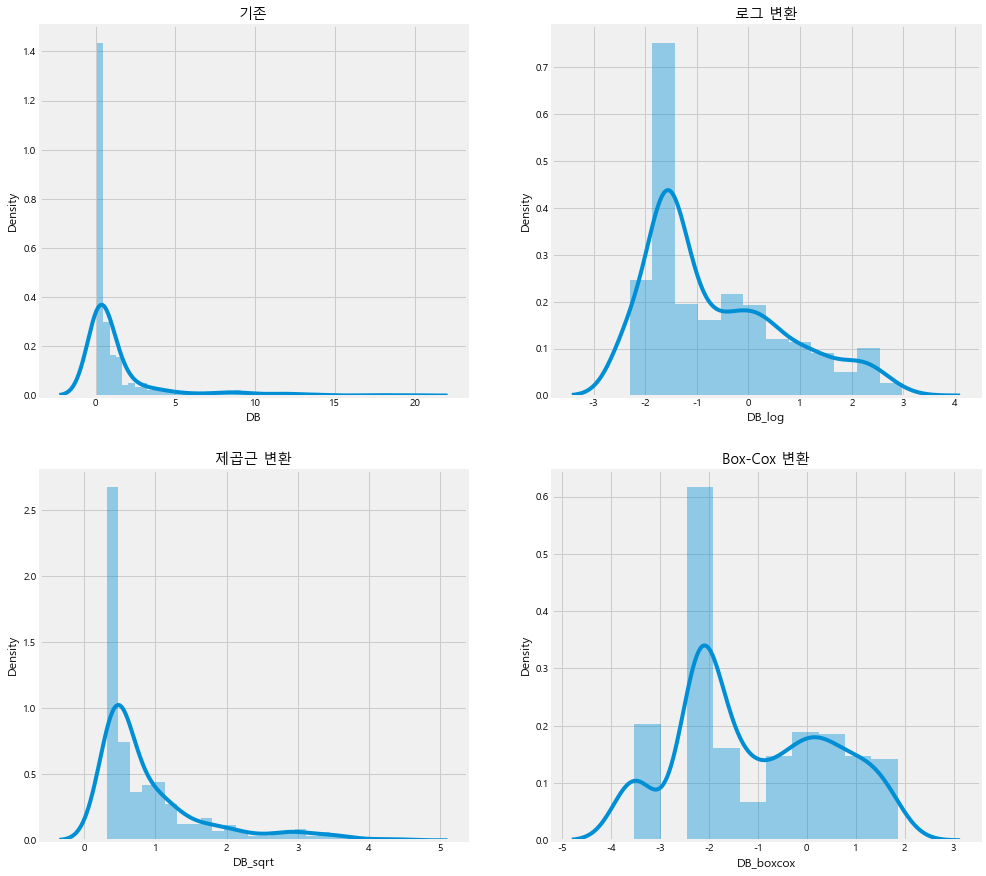

In [43]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15, 15)

sns.distplot(df_indian_DB['DB'], ax = axes[0][0])
sns.distplot(df_indian_DB['DB_log'], ax = axes[0][1])
sns.distplot(df_indian_DB['DB_sqrt'], ax = axes[1][0])
sns.distplot(df_indian_DB['DB_boxcox'], ax = axes[1][1])

axes[0][0].set_title("기존")
axes[0][1].set_title("로그 변환")
axes[1][0].set_title("제곱근 변환")
axes[1][1].set_title("Box-Cox 변환")

### 변환 방법 선택

DB는 log 방식 선택

In [44]:
df_indian['transformed_DB'] = df_indian_TB['TB_log']

## 3) Alkphos 컬럼 변환

### 4가지 방법으로 변환

In [45]:
print("왜도 값")
df_indian_Alkphos = df_indian[['Alkphos']]
print("기존 : ", df_indian_Alkphos['Alkphos'].skew())

df_indian_Alkphos['Alkphos_log'] = np.log(df_indian.Alkphos)
print("로그 변환 : ", df_indian_Alkphos['Alkphos_log'].skew())

df_indian_Alkphos['Alkphos_sqrt'] = np.sqrt(df_indian.Alkphos)
print("제곱근 변환 : ", df_indian_Alkphos['Alkphos_sqrt'].skew())

df_indian_Alkphos['Alkphos_boxcox'] = pd.Series(stats.boxcox(df_indian.Alkphos)[0])
print("Box-Cox 변환 : ", df_indian_Alkphos['Alkphos_boxcox'].skew())

왜도 값
기존 :  3.753502331321
로그 변환 :  1.323756137487406
제곱근 변환 :  2.41595457635979
Box-Cox 변환 :  -0.04846894197362466


In [46]:
df_indian_Alkphos

,Alkphos,Alkphos_log,Alkphos_sqrt,Alkphos_boxcox
0,187,5.231109,13.674794,1.352033
1,699,6.549651,26.438608,1.371418
2,490,6.194405,22.135944,1.367856
3,182,5.204007,13.490738,1.351408
4,195,5.273000,13.964240,1.352974
...,...,...,...,...
574,500,6.214608,22.360680,1.368084
575,98,4.584967,9.899495,1.333253
576,245,5.501258,15.652476,1.357629
577,184,5.214936,13.564660,1.351662


Text(0.5, 1.0, 'Box-Cox 변환')

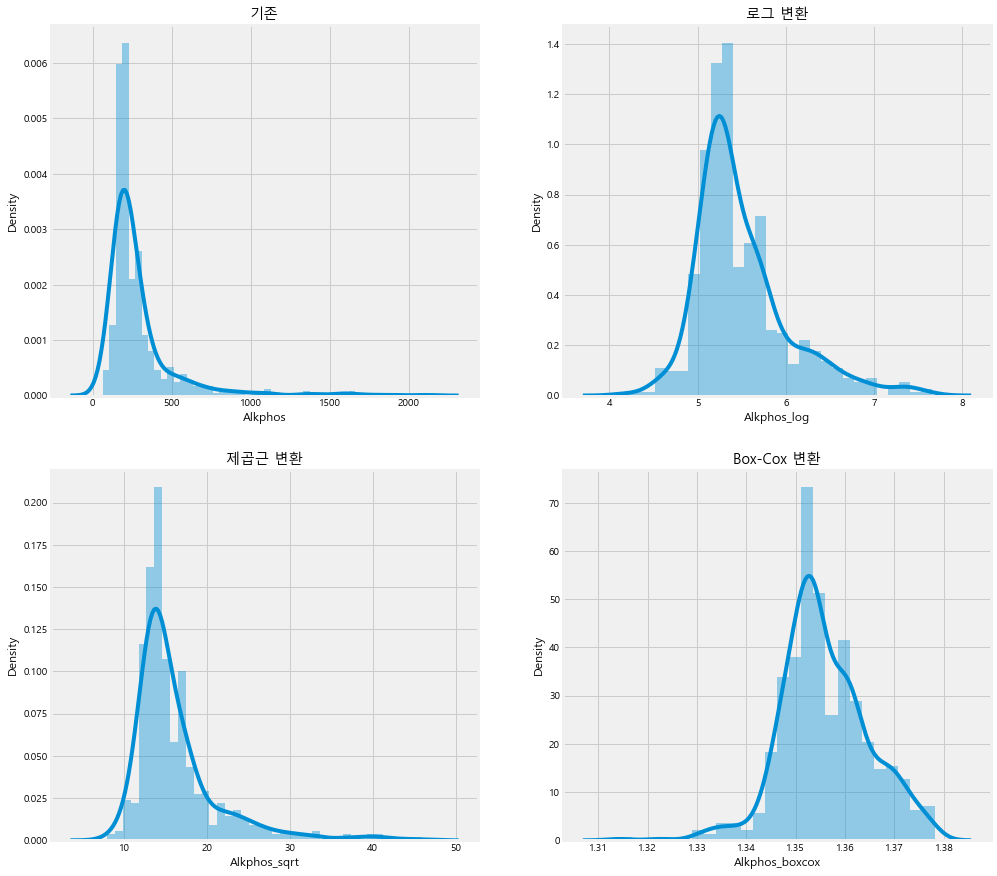

In [47]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15, 15)

sns.distplot(df_indian_Alkphos['Alkphos'], ax = axes[0][0])
sns.distplot(df_indian_Alkphos['Alkphos_log'], ax = axes[0][1])
sns.distplot(df_indian_Alkphos['Alkphos_sqrt'], ax = axes[1][0])
sns.distplot(df_indian_Alkphos['Alkphos_boxcox'], ax = axes[1][1])

axes[0][0].set_title("기존")
axes[0][1].set_title("로그 변환")
axes[1][0].set_title("제곱근 변환")
axes[1][1].set_title("Box-Cox 변환")

### 변환 방법 선택

Alkphos는 로그 방식 선택

In [48]:
df_indian['transformed_Alkphos'] = df_indian_Alkphos['Alkphos_log']

## 4) Sgpt 컬럼 변환

### 4가지 방법으로 변환

In [49]:
print("왜도 값")
df_indian_Sgpt = df_indian[['Sgpt']]
print("기존 : ", df_indian_Sgpt['Sgpt'].skew())

df_indian_Sgpt['Sgpt_log'] = np.log(df_indian.Sgpt)
print("로그 변환 : ", df_indian_Sgpt['Sgpt_log'].skew())

df_indian_Sgpt['Sgpt_sqrt'] = np.sqrt(df_indian.Sgpt)
print("제곱근 변환 : ", df_indian_Sgpt['Sgpt_sqrt'].skew())

df_indian_Sgpt['Sgpt_boxcox'] = pd.Series(stats.boxcox(df_indian.Sgpt)[0])
print("Box-Cox 변환 : ", df_indian_Sgpt['Sgpt_boxcox'].skew())

왜도 값
기존 :  6.527575457853868
로그 변환 :  1.421584315811694
제곱근 변환 :  3.7349400288197554
Box-Cox 변환 :  0.07709432281252686


In [50]:
df_indian_Sgpt

,Sgpt,Sgpt_log,Sgpt_sqrt,Sgpt_boxcox
0,16,2.772589,4.000000,1.480586
1,64,4.158883,8.000000,1.720513
2,60,4.094345,7.745967,1.712715
3,14,2.639057,3.741657,1.447180
4,27,3.295837,5.196152,1.591536
...,...,...,...,...
574,20,2.995732,4.472136,1.531556
575,35,3.555348,5.916080,1.636467
576,48,3.871201,6.928203,1.683677
577,29,3.367296,5.385165,1.604510


Text(0.5, 1.0, 'Box-Cox 변환')

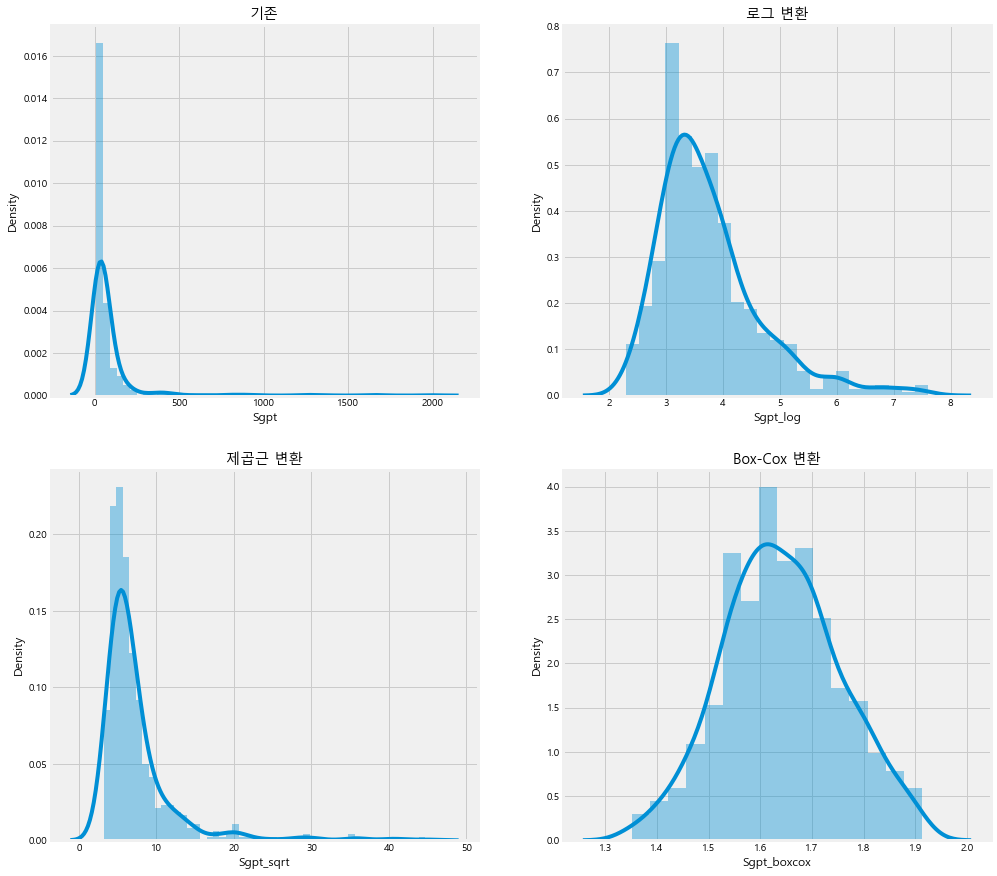

In [51]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15, 15)

sns.distplot(df_indian_Sgpt['Sgpt'], ax = axes[0][0])
sns.distplot(df_indian_Sgpt['Sgpt_log'], ax = axes[0][1])
sns.distplot(df_indian_Sgpt['Sgpt_sqrt'], ax = axes[1][0])
sns.distplot(df_indian_Sgpt['Sgpt_boxcox'], ax = axes[1][1])

axes[0][0].set_title("기존")
axes[0][1].set_title("로그 변환")
axes[1][0].set_title("제곱근 변환")
axes[1][1].set_title("Box-Cox 변환")

### 변환 방법 선택

Sgpt는 Box-Cox 방식 선택

In [52]:
df_indian['transformed_Sgpt'] = df_indian_Sgpt['Sgpt_boxcox']

## 5) Sgot 컬럼 변환

### 4가지 방법으로 변환

In [53]:
print("왜도 값")
df_indian_Sgot = df_indian[['Sgot']]
print("기존 : ", df_indian_Sgot['Sgot'].skew())

df_indian_Sgot['Sgot_log'] = np.log(df_indian.Sgot)
print("로그 변환 : ", df_indian_Sgot['Sgot_log'].skew())

df_indian_Sgot['Sgot_sqrt'] = np.sqrt(df_indian.Sgot)
print("제곱근 변환 : ", df_indian_Sgot['Sgot_sqrt'].skew())

df_indian_Sgot['Sgot_boxcox'] = pd.Series(stats.boxcox(df_indian.Sgot)[0])
print("Box-Cox 변환 : ", df_indian_Sgot['Sgot_boxcox'].skew())

왜도 값
기존 :  10.512250957996228
로그 변환 :  1.1905404452526758
제곱근 변환 :  3.937861916945337
Box-Cox 변환 :  0.10704613765347921


In [54]:
df_indian_Sgot

,Sgot,Sgot_log,Sgot_sqrt,Sgot_boxcox
0,18,2.890372,4.242641,1.627165
1,100,4.605170,10.000000,1.959190
2,68,4.219508,8.246211,1.904873
3,20,2.995732,4.472136,1.655647
4,59,4.077537,7.681146,1.882413
...,...,...,...,...
574,34,3.526361,5.830952,1.780458
575,31,3.433987,5.567764,1.760791
576,49,3.891820,7.000000,1.850810
577,32,3.465736,5.656854,1.767642


Text(0.5, 1.0, 'Box-Cox 변환')

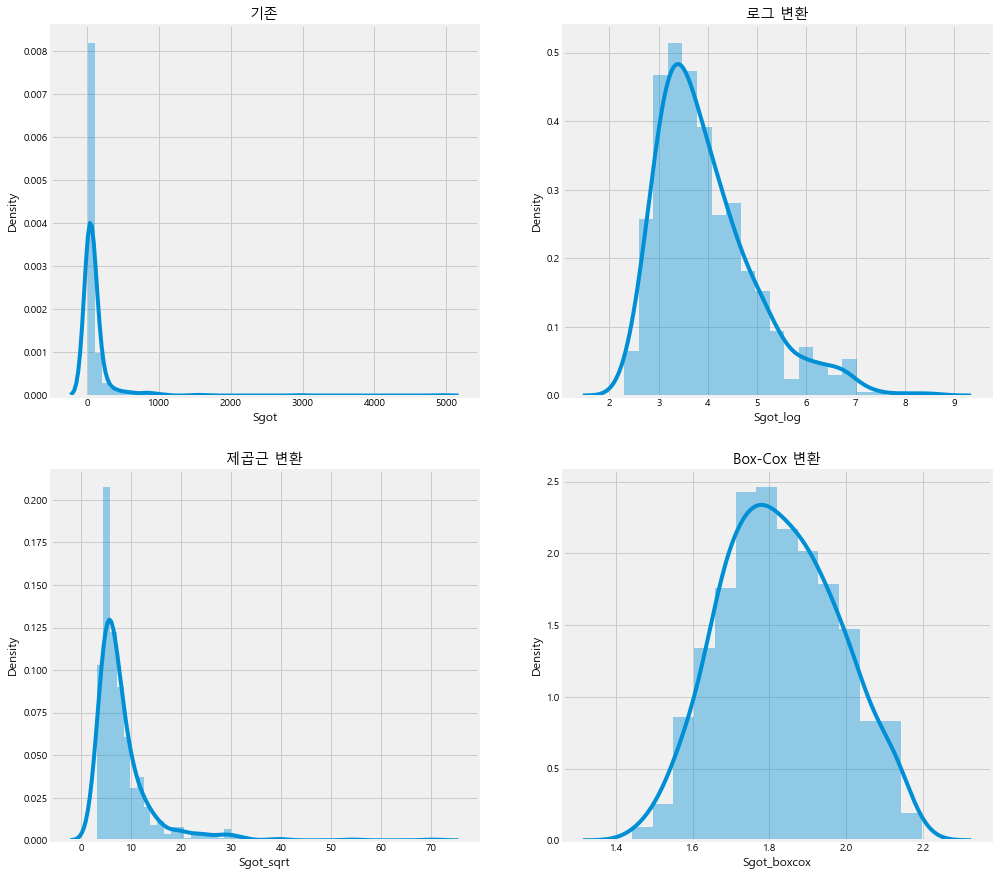

In [55]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15, 15)

sns.distplot(df_indian_Sgot['Sgot'], ax = axes[0][0])
sns.distplot(df_indian_Sgot['Sgot_log'], ax = axes[0][1])
sns.distplot(df_indian_Sgot['Sgot_sqrt'], ax = axes[1][0])
sns.distplot(df_indian_Sgot['Sgot_boxcox'], ax = axes[1][1])

axes[0][0].set_title("기존")
axes[0][1].set_title("로그 변환")
axes[1][0].set_title("제곱근 변환")
axes[1][1].set_title("Box-Cox 변환")

### 변환 방법 선택

Sgot는 Box-Cox 방식 선택

In [56]:
df_indian['transformed_Sgot'] = df_indian_Sgot['Sgot_boxcox']

In [57]:
df_indian['Age'].min()

4

In [58]:
df_indian['Age'].max()

90

# EDA_5 정규화

In [59]:
df_indian.columns

Index(['index', 'Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP',
       'ALB', 'A/G', 'Selector', 'transformed_TB', 'transformed_DB',
       'transformed_Alkphos', 'transformed_Sgpt', 'transformed_Sgot'],
      dtype='object')

In [60]:
before_ss_col = ['Age', 'transformed_TB', 'transformed_DB', 
                 'transformed_Alkphos', 'transformed_Sgpt', 'transformed_Sgot', 
                 'TP', 'ALB', 'A/G']

after_ss_col = ['Age', 'TB', 'DB',
                'Alkphos', 'Sgpt', 'Sgot',
                'TP', 'ALB', 'A/G']

In [61]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler().fit_transform(df_indian[before_ss_col])
df_indian_SS = pd.DataFrame(SS, columns = after_ss_col)
df_indian_SS

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G
0,1.247403,-1.002895,-0.808414,-0.501396,-1.419175,-1.325982,0.293722,0.203446,-0.147390
1,1.062306,1.633726,1.884133,1.995333,0.697530,0.855514,0.939655,0.077462,-0.648461
2,1.062306,1.493034,1.490968,1.322657,0.628734,0.498634,0.478274,0.203446,-0.178707
3,0.815511,-0.306920,-0.458610,-0.552715,-1.713896,-1.138851,0.293722,0.329431,0.165780
4,1.679294,1.172037,0.876147,-0.422074,-0.440342,0.351069,0.755102,-0.930414,-1.713237
...,...,...,...,...,...,...,...,...,...
574,0.938909,-1.846798,-1.138404,1.360912,-0.969501,-0.318808,-0.536763,-1.938290,-1.807188
575,-0.295067,-1.364077,-0.959595,-1.724899,-0.043949,-0.448024,-0.444487,0.077462,0.478949
576,0.445318,-0.721054,-0.677455,0.010146,0.372556,0.143426,-0.075383,0.077462,0.165780
577,-0.850356,0.101573,-0.201300,-0.532021,-0.325885,-0.403013,0.293722,0.329431,0.165780


In [62]:
df_indian_SS["Gender"] = df_indian["Gender"]
df_indian_SS["Selector"] = df_indian["Selector"]
df_indian_SS

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Gender,Selector
0,1.247403,-1.002895,-0.808414,-0.501396,-1.419175,-1.325982,0.293722,0.203446,-0.147390,Female,1
1,1.062306,1.633726,1.884133,1.995333,0.697530,0.855514,0.939655,0.077462,-0.648461,Male,1
2,1.062306,1.493034,1.490968,1.322657,0.628734,0.498634,0.478274,0.203446,-0.178707,Male,1
3,0.815511,-0.306920,-0.458610,-0.552715,-1.713896,-1.138851,0.293722,0.329431,0.165780,Male,1
4,1.679294,1.172037,0.876147,-0.422074,-0.440342,0.351069,0.755102,-0.930414,-1.713237,Male,1
...,...,...,...,...,...,...,...,...,...,...,...
574,0.938909,-1.846798,-1.138404,1.360912,-0.969501,-0.318808,-0.536763,-1.938290,-1.807188,Male,2
575,-0.295067,-1.364077,-0.959595,-1.724899,-0.043949,-0.448024,-0.444487,0.077462,0.478949,Male,1
576,0.445318,-0.721054,-0.677455,0.010146,0.372556,0.143426,-0.075383,0.077462,0.165780,Male,1
577,-0.850356,0.101573,-0.201300,-0.532021,-0.325885,-0.403013,0.293722,0.329431,0.165780,Male,1


## 정규성 검정

In [63]:
from scipy.stats import kstest, norm

n_col = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G']

for n in n_col :
    print(n+" : ", end = "")
    ks_statistic, p_value = kstest(df_indian_SS[n], 'norm')
    print(ks_statistic, p_value)
# p-value값이 크므로 표본이 정규분포를 따른다고 판단

Age : 0.055817565945624814 0.05217818135361407
TB : 0.16262076173484263 7.580012779326092e-14
DB : 0.1983319042229521 1.9573289169200417e-20
Alkphos : 0.1449993041958581 4.3578897321043914e-11
Sgpt : 0.034021292383736246 0.5033247864397694
Sgot : 0.041677379926385594 0.25968398180498387
TP : 0.06629193028006064 0.011759503499597588
ALB : 0.05928894090399639 0.03275777350192399
A/G : 0.1284656968325968 8.636977189276549e-09


In [64]:
df_indian_SS.columns

Index(['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G',
       'Gender', 'Selector'],
      dtype='object')

# EDA_6 범주형 변수 카테고리 변수화

## 원본 + 카테고리

In [65]:
oc_col = list(df_indian_original.columns)
oc_col.remove("Gender")
oc_col.remove("Selector")

df_indian_C = df_indian_original[oc_col]

gender_dumy = pd.get_dummies(df_indian_original[["Gender"]])

df_indian_C[gender_dumy.columns] = gender_dumy
df_indian_C['Selector'] = df_indian_SS['Selector']
df_indian_C

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Gender_Female,Gender_Male,Selector
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0,1.0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1,1.0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1,1.0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1,1.0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0,1,2.0
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,0,1,NaN
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,0,1,NaN
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,0,1,NaN


## 정규화 + 카테고리

In [66]:
sc_col = list(df_indian_SS.columns)
sc_col.remove("Gender")
sc_col.remove("Selector")

df_indian_SS_C = df_indian_SS[sc_col]

gender_dumy = pd.get_dummies(df_indian_SS[["Gender"]])

df_indian_SS_C[gender_dumy.columns] = gender_dumy
df_indian_SS_C['Selector'] = df_indian_SS['Selector']
df_indian_SS_C

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Gender_Female,Gender_Male,Selector
0,1.247403,-1.002895,-0.808414,-0.501396,-1.419175,-1.325982,0.293722,0.203446,-0.147390,1,0,1
1,1.062306,1.633726,1.884133,1.995333,0.697530,0.855514,0.939655,0.077462,-0.648461,0,1,1
2,1.062306,1.493034,1.490968,1.322657,0.628734,0.498634,0.478274,0.203446,-0.178707,0,1,1
3,0.815511,-0.306920,-0.458610,-0.552715,-1.713896,-1.138851,0.293722,0.329431,0.165780,0,1,1
4,1.679294,1.172037,0.876147,-0.422074,-0.440342,0.351069,0.755102,-0.930414,-1.713237,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
574,0.938909,-1.846798,-1.138404,1.360912,-0.969501,-0.318808,-0.536763,-1.938290,-1.807188,0,1,2
575,-0.295067,-1.364077,-0.959595,-1.724899,-0.043949,-0.448024,-0.444487,0.077462,0.478949,0,1,1
576,0.445318,-0.721054,-0.677455,0.010146,0.372556,0.143426,-0.075383,0.077462,0.165780,0,1,1
577,-0.850356,0.101573,-0.201300,-0.532021,-0.325885,-0.403013,0.293722,0.329431,0.165780,0,1,1


# 정리

## 원본

In [67]:
df_indian_original

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## 원본 + 카테고리

In [68]:
df_indian_C

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Gender_Female,Gender_Male,Selector
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0,1.0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1,1.0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1,1.0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1,1.0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0,1,2.0
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,0,1,NaN
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,0,1,NaN
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,0,1,NaN


## 정규화

In [69]:
df_indian_SS

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Gender,Selector
0,1.247403,-1.002895,-0.808414,-0.501396,-1.419175,-1.325982,0.293722,0.203446,-0.147390,Female,1
1,1.062306,1.633726,1.884133,1.995333,0.697530,0.855514,0.939655,0.077462,-0.648461,Male,1
2,1.062306,1.493034,1.490968,1.322657,0.628734,0.498634,0.478274,0.203446,-0.178707,Male,1
3,0.815511,-0.306920,-0.458610,-0.552715,-1.713896,-1.138851,0.293722,0.329431,0.165780,Male,1
4,1.679294,1.172037,0.876147,-0.422074,-0.440342,0.351069,0.755102,-0.930414,-1.713237,Male,1
...,...,...,...,...,...,...,...,...,...,...,...
574,0.938909,-1.846798,-1.138404,1.360912,-0.969501,-0.318808,-0.536763,-1.938290,-1.807188,Male,2
575,-0.295067,-1.364077,-0.959595,-1.724899,-0.043949,-0.448024,-0.444487,0.077462,0.478949,Male,1
576,0.445318,-0.721054,-0.677455,0.010146,0.372556,0.143426,-0.075383,0.077462,0.165780,Male,1
577,-0.850356,0.101573,-0.201300,-0.532021,-0.325885,-0.403013,0.293722,0.329431,0.165780,Male,1


## 정규화 + 카테고리

In [70]:
df_indian_SS_C

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Gender_Female,Gender_Male,Selector
0,1.247403,-1.002895,-0.808414,-0.501396,-1.419175,-1.325982,0.293722,0.203446,-0.147390,1,0,1
1,1.062306,1.633726,1.884133,1.995333,0.697530,0.855514,0.939655,0.077462,-0.648461,0,1,1
2,1.062306,1.493034,1.490968,1.322657,0.628734,0.498634,0.478274,0.203446,-0.178707,0,1,1
3,0.815511,-0.306920,-0.458610,-0.552715,-1.713896,-1.138851,0.293722,0.329431,0.165780,0,1,1
4,1.679294,1.172037,0.876147,-0.422074,-0.440342,0.351069,0.755102,-0.930414,-1.713237,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
574,0.938909,-1.846798,-1.138404,1.360912,-0.969501,-0.318808,-0.536763,-1.938290,-1.807188,0,1,2
575,-0.295067,-1.364077,-0.959595,-1.724899,-0.043949,-0.448024,-0.444487,0.077462,0.478949,0,1,1
576,0.445318,-0.721054,-0.677455,0.010146,0.372556,0.143426,-0.075383,0.077462,0.165780,0,1,1
577,-0.850356,0.101573,-0.201300,-0.532021,-0.325885,-0.403013,0.293722,0.329431,0.165780,0,1,1
